In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
feat_df = pd.read_csv("features.csv", sep=";", index_col=0)
tgt_df = pd.read_csv("targets.csv", sep=";", index_col=0)

le = LabelEncoder()

In [3]:
print(f"All {(feat_df.dtypes=='float64').sum()} features are of float64 type, while the Diagnosis is of {tgt_df.dtypes.values[0]} type.")
print("To simplify the data manipulation, the Diagnosis shall be numerically encoded.")

All 30 features are of float64 type, while the Diagnosis is of object type.
To simplify the data manipulation, the Diagnosis shall be numerically encoded.


In [4]:
tgt_df.Diagnosis = le.fit_transform(tgt_df.Diagnosis)
print(le.classes_, le.transform(le.classes_))

feats = feat_df.columns
full_df = feat_df.join(tgt_df)
display(full_df)

['B' 'M'] [0 1]


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [5]:
feat_means = list(feat_df.columns[:10])
feat_means.append("Diagnosis")
print("These columns represent the mean measurements + the target column:")
print(feat_means)

These columns represent the mean measurements + the target column:
['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'Diagnosis']


In [6]:
print("Descriptive statistics:")
display(full_df.describe())
print(full_df.columns)

Descriptive statistics:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')


In [7]:
print("An example comparison of a feature means, worst instances, and its standard deviations:")
full_df.describe()[["radius1", "radius3", "radius2"]]

An example comparison of a feature means, worst instances, and its standard deviations:


,radius1,radius3,radius2
count,569.000000,569.000000,569.000000
mean,14.127292,16.269190,0.405172
std,3.524049,4.833242,0.277313
min,6.981000,7.930000,0.111500
25%,11.700000,13.010000,0.232400
50%,13.370000,14.970000,0.324200
75%,15.780000,18.790000,0.478900
max,28.110000,36.040000,2.873000


Of course, the worst instances of radius measurements by definition must have higher mean, min/max, and, consequently, std. Also, standard deviations of measurements on individual patients must be lower than the std of the same measurement between patients, which holds.

In [8]:
scaler = StandardScaler()
std_full_df = full_df.copy()
std_full_df[feats] = scaler.fit_transform(full_df[feats]) # feature standardization for comparable parallel graphing
display(std_full_df)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


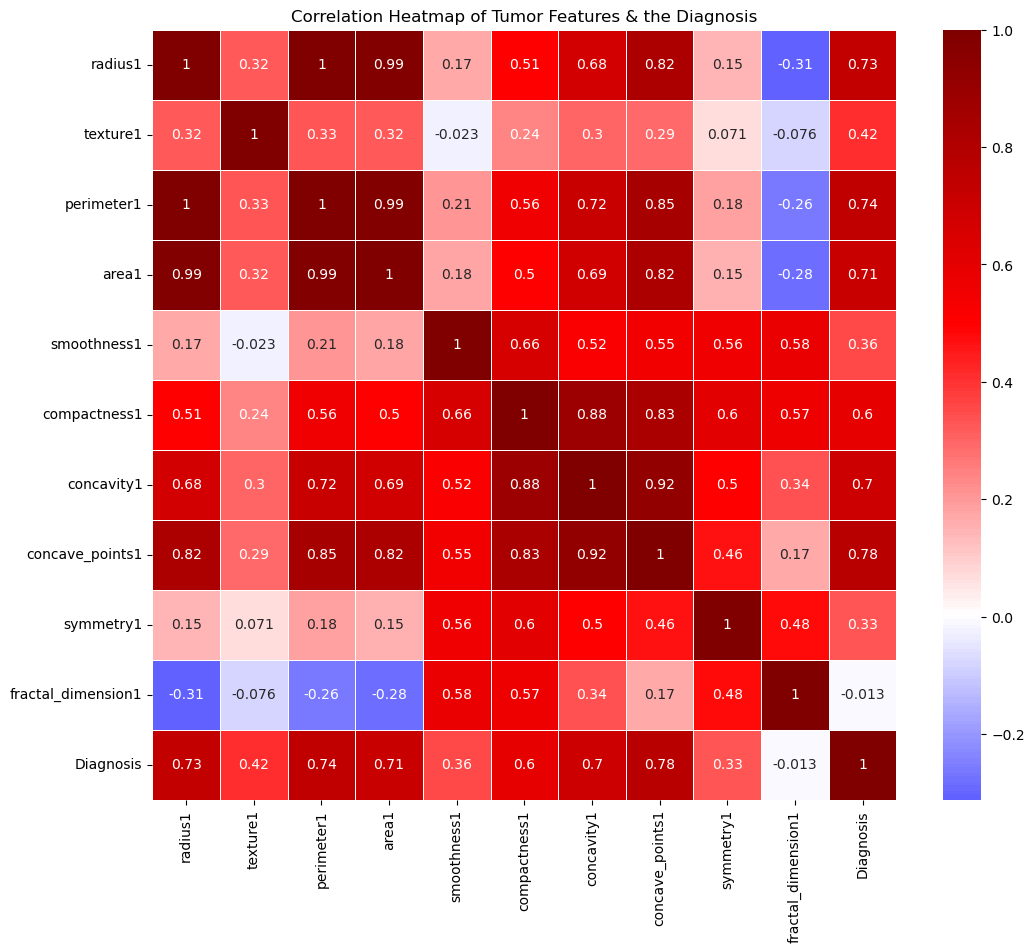

In [9]:
correlation_matrix = std_full_df[feat_means].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Tumor Features & the Diagnosis')
plt.show()

The deeper the red, the higher the correlation. If the correlation is high between some features, then some of them may be redundant.

4 highly correlated pairs: {('concave_points1', 'concavity1'), ('area1', 'perimeter1'), ('perimeter1', 'radius1'), ('area1', 'radius1')}


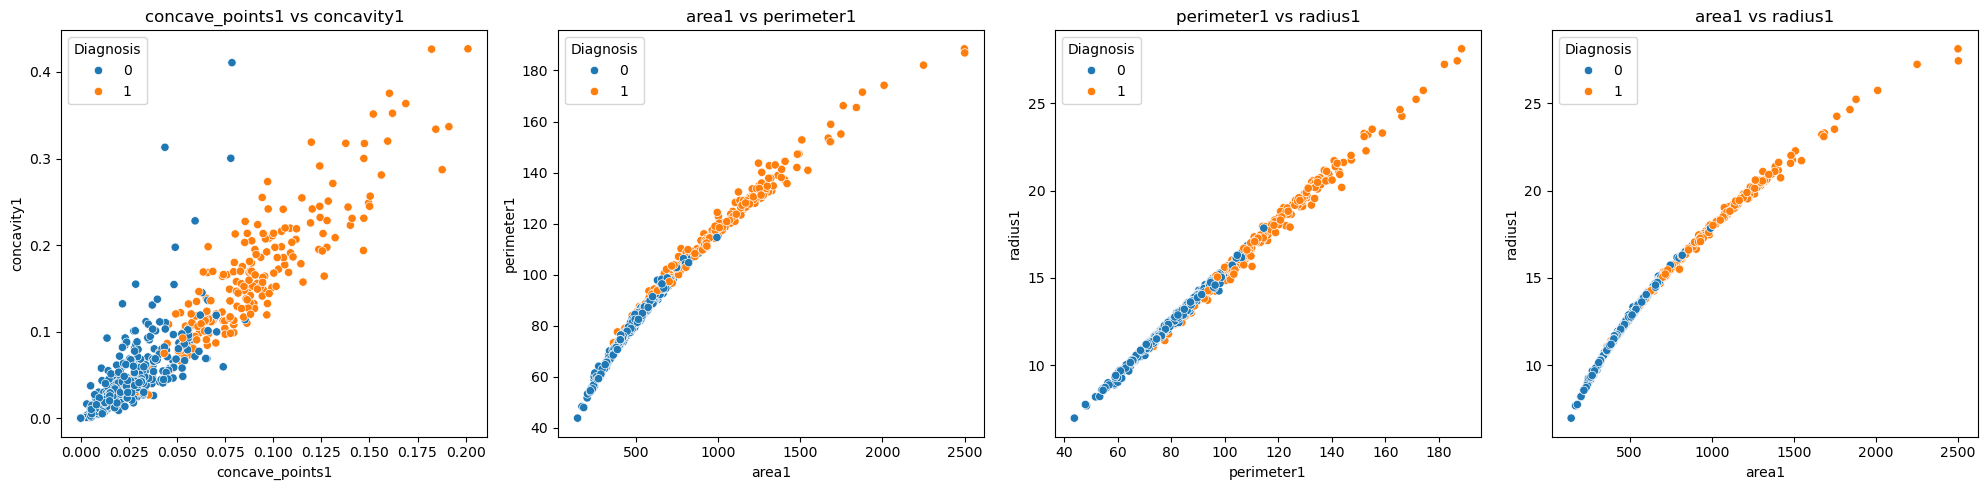

In [10]:
highly_correlated_pairs = set()
for feature1 in correlation_matrix.columns:
    for feature2 in correlation_matrix.columns:
        if feature1 < feature2 and correlation_matrix.loc[feature1, feature2] > 0.9:
            highly_correlated_pairs.add((feature1, feature2))

print(len(highly_correlated_pairs), "highly correlated pairs:", highly_correlated_pairs)

fig, axes = plt.subplots(1, len(highly_correlated_pairs), figsize=(20,5))

for i, (feature1, feature2) in enumerate(highly_correlated_pairs):
    sns.scatterplot(data=full_df, x=feature1, y=feature2, ax=axes[i], hue="Diagnosis", legend="brief") # Seaborn subplots of scatter plots
    axes[i].set_title(f'{feature1} vs {feature2}')
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)

plt.tight_layout()
plt.show()

Perimeter and radius are obviously linearly correlated $(d=2r)$, while area is quadratically related to perimeter and radius. On the other hand, concave_points and concavity is not as neatly connected, though the high correlation between them $(0.92)$.

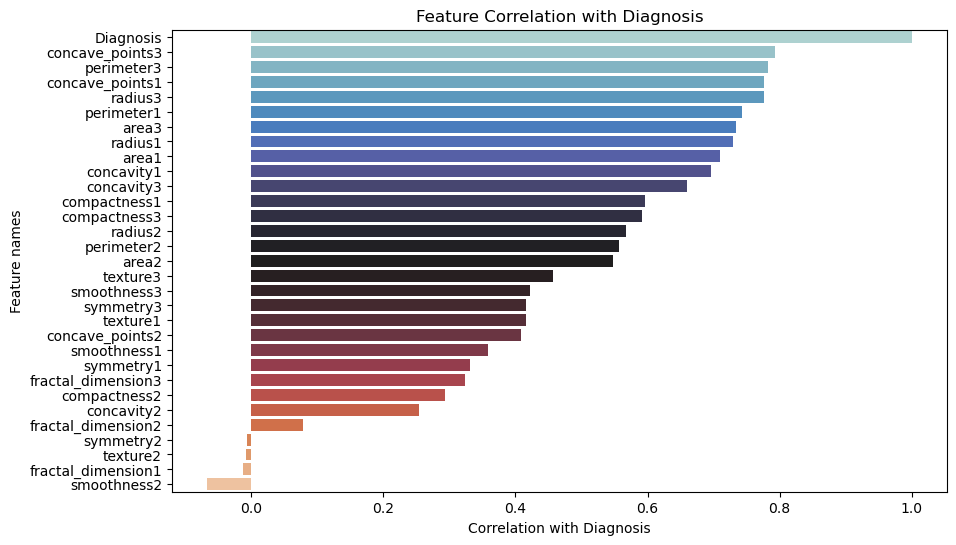

In [11]:
corr_graph_data = full_df.corr()["Diagnosis"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_graph_data.values, y=corr_graph_data.index, palette='icefire', hue=corr_graph_data.index) # showing the relative correlations between features with the target

plt.xlabel('Correlation with Diagnosis')
plt.ylabel('Feature names')
plt.title('Feature Correlation with Diagnosis')

plt.show()

In [12]:
fig = px.scatter_3d(full_df, x='radius1', y='radius2', z='radius3',
                    color='Diagnosis', symbol='Diagnosis')
fig.show() # 3D plot of radius means, worst instances, and standard deviations with color-indicated diagnosis

This visualization highlights the obvious trend-the larger the tumor, the higher the probability of its malignancy.

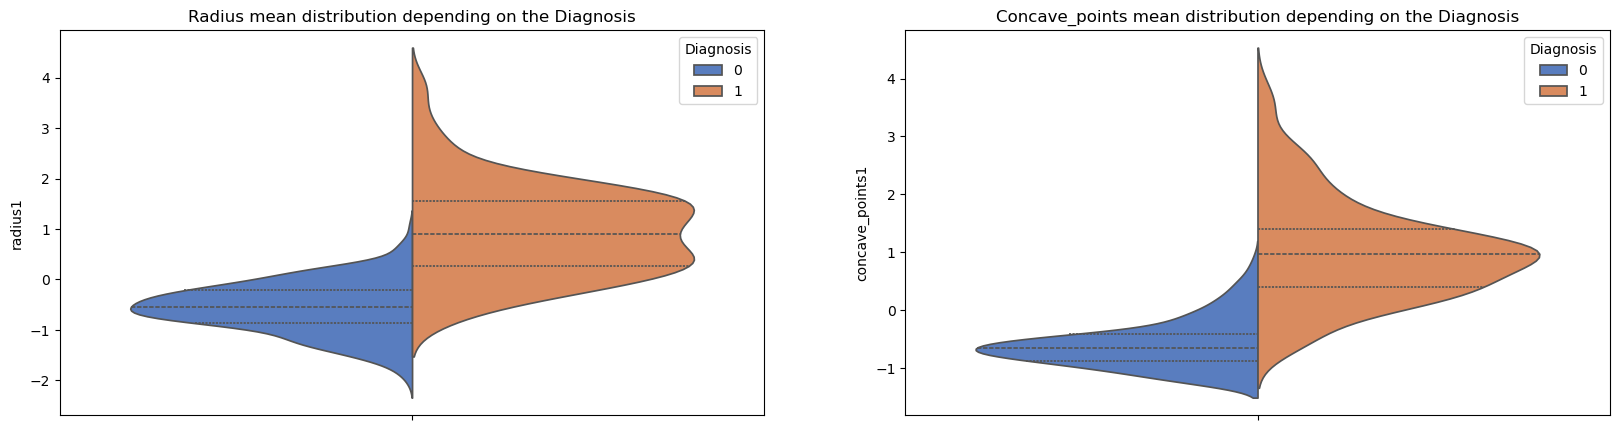

In [13]:
_, ax = plt.subplots(1,2, figsize = (20,5))
sns.violinplot(y='radius1', hue="Diagnosis", data=std_full_df, inner='quartile', palette='muted', split = True, ax=ax[0]).set_title("Radius mean distribution depending on the Diagnosis")
sns.violinplot(y='concave_points1', hue="Diagnosis", data=std_full_df, inner='quartile', palette='muted', split = True, ax=ax[1]).set_title("Concave_points mean distribution depending on the Diagnosis")
plt.show()

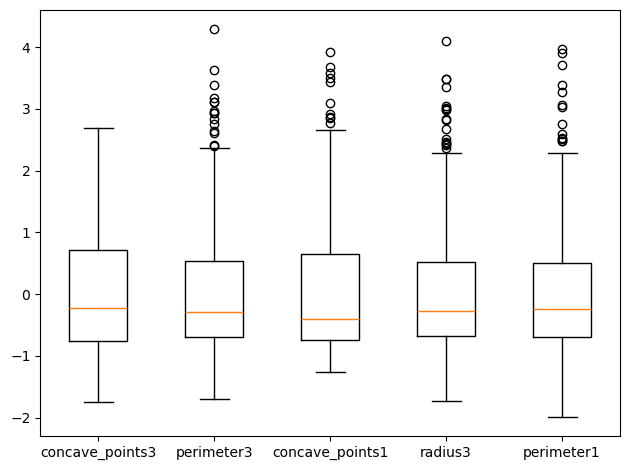

In [14]:
cols_of_interest = corr_graph_data[1:6].index
plt.boxplot(std_full_df[cols_of_interest], showfliers=True, labels=cols_of_interest)
plt.tight_layout()
plt.show()

Concave points don't have as many outliers as other important features. Also, standardized radius3 is still quite similarly distributed as perimeter1, though they are not as closely correlated as radius1 and perimeter1. The outliers of radii and perimeters unfortunately belong to bigger masses, probably malignant.

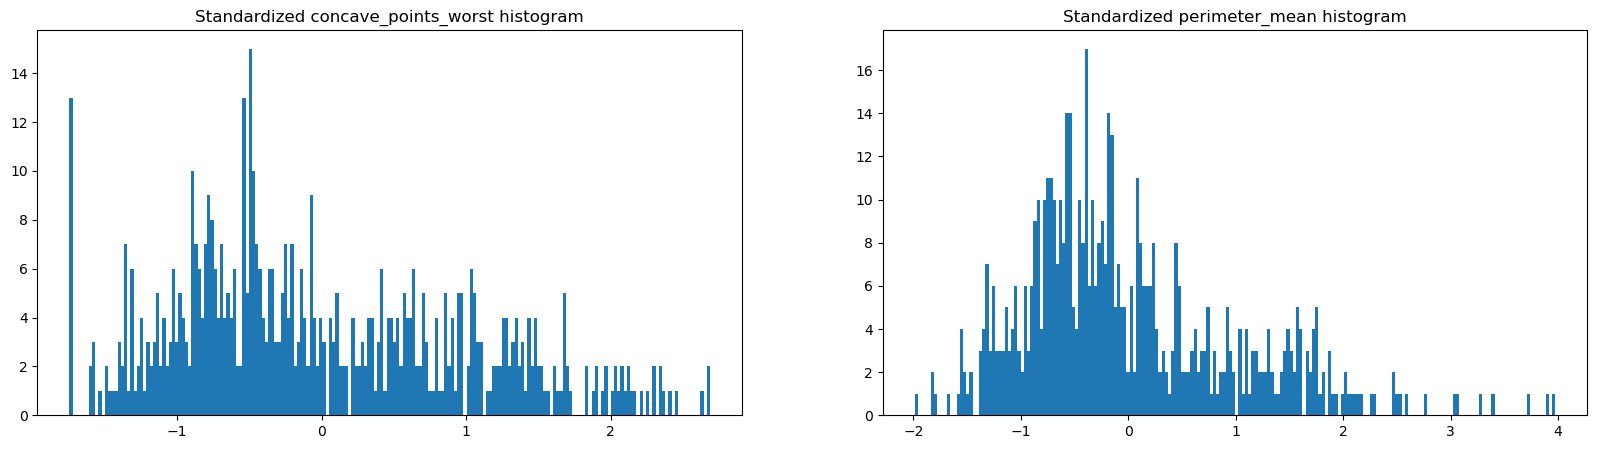

In [15]:
_, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].hist(std_full_df.concave_points3, bins=200)
ax[0].set_title("Standardized concave_points_worst histogram")
ax[1].hist(std_full_df.perimeter1, bins=200)
ax[1].set_title("Standardized perimeter_mean histogram")
plt.show()

These histograms show the same take-away as the above box plots => concave points are more centered around the mean than perimeter, while the perimeter seems to be more symmetrically distributed (less right skewed). 

# Random Forest

Due to the unbalanced starting sample, a higher weight is attached to the malignant tumors, as there are fewer malignant diagnozes in the given dataset.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(feat_df, tgt_df, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42, class_weight={0:1, 1:1.5}, n_estimators=88)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Luka\AppData\Local\Temp\ipykernel_17944\1058134688.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



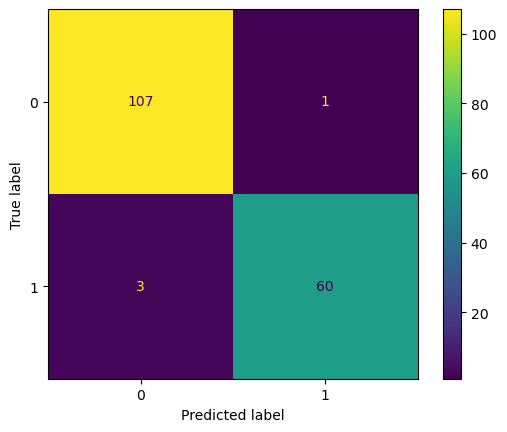

In [17]:
c = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c).plot()
plt.grid(visible=False)
plt.show()

In [18]:
print(f"Only 3 false negatives were predicted, along with 1 false positive in the test sample of {len(X_test)} tumors.")

Only 3 false negatives were predicted, along with 1 false positive in the test sample of 171 tumors.


In [19]:
print(str(classification_report(y_test, y_pred, digits=4)))

              precision    recall  f1-score   support

           0     0.9727    0.9907    0.9817       108
           1     0.9836    0.9524    0.9677        63

    accuracy                         0.9766       171
   macro avg     0.9782    0.9716    0.9747       171
weighted avg     0.9767    0.9766    0.9765       171



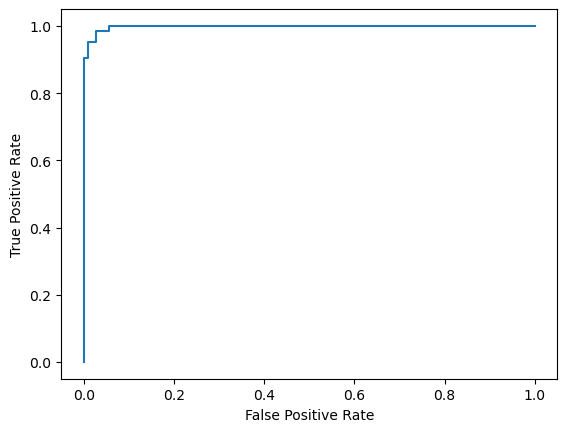

In [20]:
falpos, trupos, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(falpos, trupos)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [21]:
print(f"Model AUC score: {round(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]), 4)}")

Model AUC score: 0.9978


# Feature selection

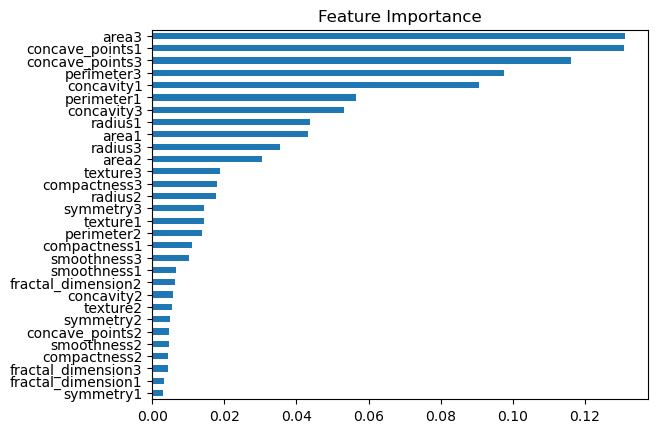

In [22]:
feature_importance = pd.Series(model.feature_importances_, index=feats).sort_values()
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Features below perimeter1 in the above diagram have significantly lower importance, thus an arbitrary number of 6 features will be used to demonstrate the redundancy in the dataset.

In [23]:
feats_to_keep = feat_df[feature_importance.sort_values(ascending=False).index]
correlation_matrix = feats_to_keep.corr()

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)) # filter only the upper triangular matrix
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)] # remove highly correlated features

final_feats_to_keep = feature_importance.drop(index=to_drop).nlargest(6).index # another filter to bound the number of used features to 6 or below
print(np.array([any(upper_triangle[column] > 0.9) for column in upper_triangle.columns]).sum())
print(final_feats_to_keep, len(final_feats_to_keep))

10
Index(['area3', 'concave_points1', 'concavity3', 'area2', 'texture3',
       'compactness3'],
      dtype='object') 6


# Random Forest with reduced dataset

In [24]:
X_train_r, X_test_r, y_train, y_test = train_test_split(feat_df[final_feats_to_keep], tgt_df, test_size=0.3, random_state=42)
print(len(X_train_r), len(X_test_r))
model = RandomForestClassifier(random_state=42)
model.fit(X_train_r, y_train)
y_pred = model.predict(X_test_r)

398 171


C:\Users\Luka\AppData\Local\Temp\ipykernel_17944\1572142654.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



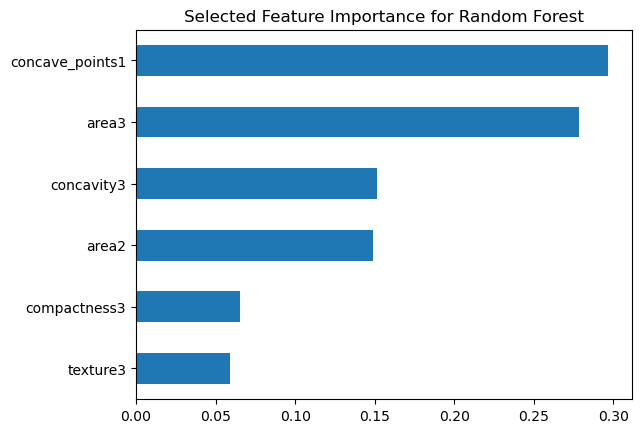

In [25]:
feature_importance = pd.Series(model.feature_importances_).sort_values()
feature_importance.index = np.array(final_feats_to_keep)[np.array(feature_importance.index)]
feature_importance.plot(kind='barh')
plt.title('Selected Feature Importance for Random Forest')
plt.show()

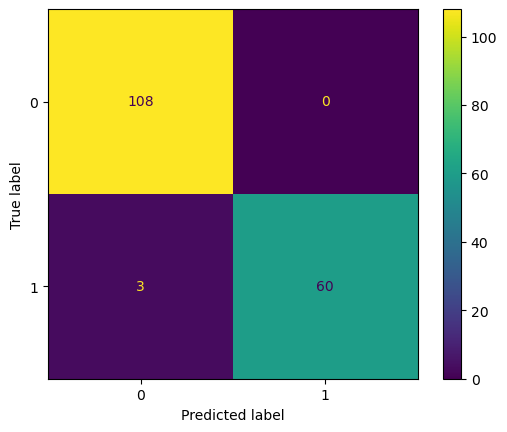

In [26]:
c = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c).plot()
plt.grid(visible=False)
plt.show()

In [27]:
print(f"Only 3 false negatives were predicted, along with no false positive in the test sample of {len(X_test_r)} tumors using only the most important features in the dataset, thus proving the redundancy in the remaining 24 features.")

Only 3 false negatives were predicted, along with no false positive in the test sample of 171 tumors using only the most important features in the dataset, thus proving the redundancy in the remaining 24 features.


In [28]:
print(str(classification_report(y_test, y_pred, digits=4)))

              precision    recall  f1-score   support

           0     0.9730    1.0000    0.9863       108
           1     1.0000    0.9524    0.9756        63

    accuracy                         0.9825       171
   macro avg     0.9865    0.9762    0.9810       171
weighted avg     0.9829    0.9825    0.9824       171



Text(0, 0.5, 'True Positive Rate')

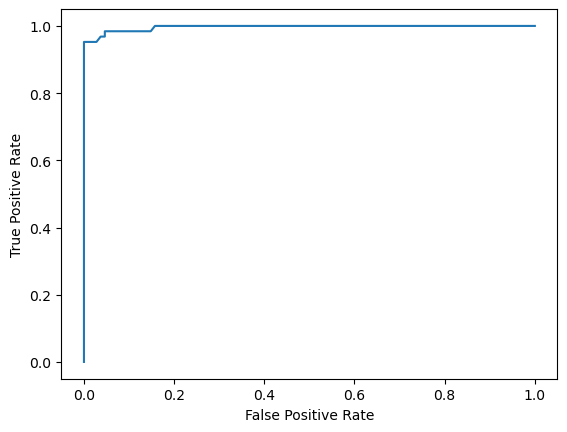

In [29]:
falpos, trupos, _ = roc_curve(y_test, model.predict_proba(X_test_r)[:,1])
plt.plot(falpos, trupos)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [30]:
print(f"Model AUC score: {round(roc_auc_score(y_test, model.predict_proba(X_test_r)[:,1]), 4)}")

Model AUC score: 0.9963


# KNN with full dataset

In [31]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

c:\Users\Luka\anaconda3\envs\lab1\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



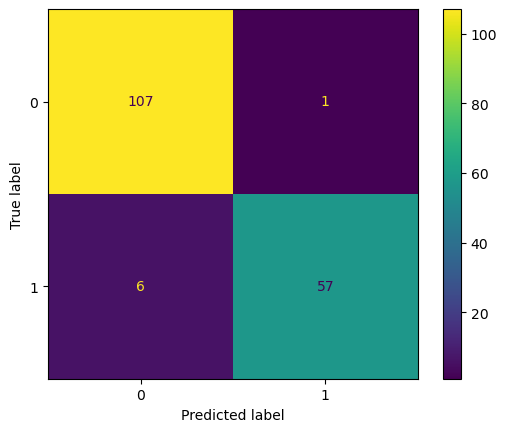

In [32]:
c = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c).plot()
plt.grid(visible=False)
plt.show()

In [33]:
print(f"Only 6 false negatives were predicted, along with 1 false positive in the test sample of {len(y_test)} tumors.")

Only 6 false negatives were predicted, along with 1 false positive in the test sample of 171 tumors.


In [34]:
print(str(classification_report(y_test, y_pred, digits=4)))

              precision    recall  f1-score   support

           0     0.9469    0.9907    0.9683       108
           1     0.9828    0.9048    0.9421        63

    accuracy                         0.9591       171
   macro avg     0.9648    0.9478    0.9552       171
weighted avg     0.9601    0.9591    0.9587       171



Text(0, 0.5, 'True Positive Rate')

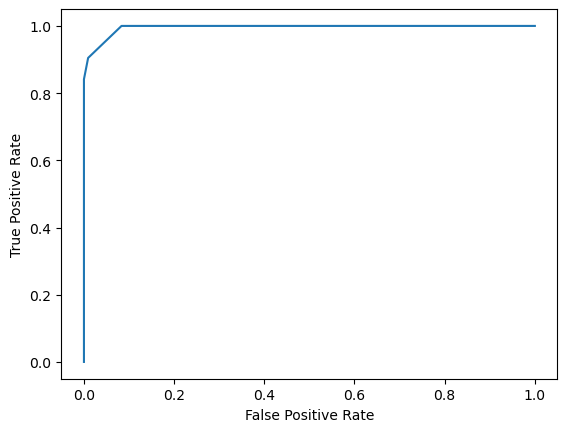

In [35]:
falpos, trupos, _ = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])
plt.plot(falpos, trupos)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [36]:
print(f"Model AUC score: {round(roc_auc_score(y_test, neigh.predict_proba(X_test)[:,1]), 4)}")

Model AUC score: 0.9953


# SVM with full dataset

In [37]:
svmc = SVC(class_weight={0:1, 1:1.5}, random_state=42)
svmc.fit(X_train,y_train)
y_pred = svmc.predict(X_test)

c:\Users\Luka\anaconda3\envs\lab1\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



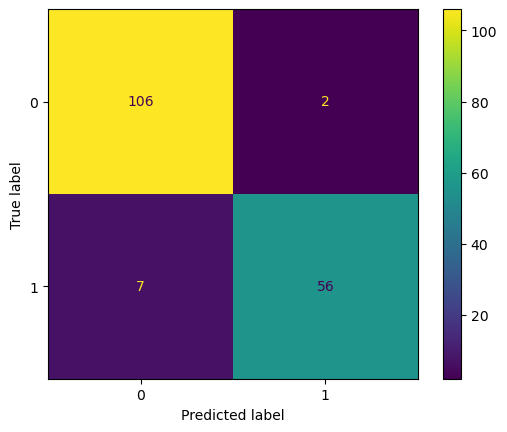

In [38]:
c = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c).plot()
plt.grid(visible=False)
plt.show()

In [39]:
print(f"Only 7 false negatives were predicted, along with 2 false positives in the test sample of {len(y_test)} tumors.")

Only 7 false negatives were predicted, along with 2 false positives in the test sample of 171 tumors.


7 2

In [40]:
print(str(classification_report(y_test, y_pred, digits=4)))

              precision    recall  f1-score   support

           0     0.9381    0.9815    0.9593       108
           1     0.9655    0.8889    0.9256        63

    accuracy                         0.9474       171
   macro avg     0.9518    0.9352    0.9424       171
weighted avg     0.9482    0.9474    0.9469       171



# SVM with reduced dataset

In [41]:
svmc.fit(X_train_r,y_train)
y_pred = svmc.predict(X_test_r)

c:\Users\Luka\anaconda3\envs\lab1\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



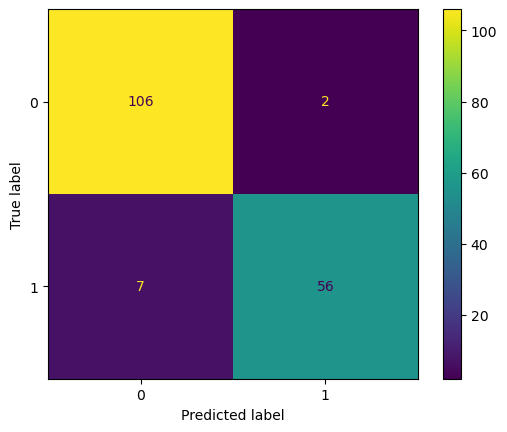

In [42]:
c = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(c).plot()
plt.grid(visible=False)
plt.show()

In [43]:
print(f"Only 7 false negatives were predicted, along with 2 false positives in the test sample of {len(y_test)} tumors using only the most important features in the dataset, thus proving the redundancy in the remaining 24 features.")

Only 7 false negatives were predicted, along with 2 false positives in the test sample of 171 tumors using only the most important features in the dataset, thus proving the redundancy in the remaining 24 features.


Support vector machine model demonstrated slighty lower testing accuracy than reported in the journal, while the Random forest model showed even higher accuracy on the reduced dataset (98 %, compared to the reported 96.5 %). This may be the result of the overfitting, not including the class weights (biased, unbalanced sampling), other model parameter tuning, and even sklearn version.